In [1]:
import pandas as pd
import seaborn as sns
import os


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
import matplotlib.pyplot as plt

In [4]:
os.getcwd()
df = pd.read_csv('heart1.csv')
df.shape

(1025, 14)

In [5]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125.0,212,0,1,168,0,1.0,2,2,3,0
1,52,1,0,125.0,87,0,1,168,0,1.0,2,2,3,0
2,70,1,0,145.0,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148.0,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138.0,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140.0,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125.0,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110.0,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110.0,254,0,0,159,0,0.0,2,0,2,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1024 non-null   float64
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 112.2 KB


In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125.0,212,0,1,168,0,1.0,2,2,3,0
1,52,1,0,125.0,87,0,1,168,0,1.0,2,2,3,0
2,70,1,0,145.0,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148.0,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138.0,294,1,1,106,0,1.9,1,3,2,0


In [8]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140.0,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125.0,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110.0,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110.0,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120.0,188,0,1,113,0,1.4,1,1,3,0


In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1024.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.433171,0.695610,0.942439,131.614258,245.886829,0.148293,0.530732,149.126829,0.335610,1.069463,1.387317,0.756098,2.323902,0.513171
std,9.072498,0.460373,1.029641,17.515881,51.813677,0.355563,0.527822,23.012554,0.472434,1.173342,0.616533,1.031262,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,87.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    1
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.isnull().count()

age         1025
sex         1025
cp          1025
trestbps    1025
chol        1025
fbs         1025
restecg     1025
thalach     1025
exang       1025
oldpeak     1025
slope       1025
ca          1025
thal        1025
target      1025
dtype: int64

In [13]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps    float64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [14]:
df == 0

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,True,False,False,True,False,False,True,False,False,False,False,True
1,False,False,True,False,False,True,False,False,True,False,False,False,False,True
2,False,False,True,False,False,True,False,False,False,False,True,True,False,True
3,False,False,True,False,False,True,False,False,True,True,False,False,False,True
4,False,True,True,False,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,True,False,False,False,True,False,True,False,False
1021,False,False,True,False,False,True,True,False,False,False,False,False,False,True
1022,False,False,True,False,False,True,True,False,False,False,False,False,False,True
1023,False,True,True,False,False,True,True,False,True,True,False,True,False,False


In [16]:
df[df==0].count()

age           0
sex         312
cp          497
trestbps      0
chol          0
fbs         873
restecg     496
thalach       0
exang       681
oldpeak     329
slope        73
ca          577
thal          7
target      499
dtype: int64

In [17]:
df.mean()

age          54.433171
sex           0.695610
cp            0.942439
trestbps    131.614258
chol        245.886829
fbs           0.148293
restecg       0.530732
thalach     149.126829
exang         0.335610
oldpeak       1.069463
slope         1.387317
ca            0.756098
thal          2.323902
target        0.513171
dtype: float64

In [19]:
df['age'].mean()

54.433170731707314

In [22]:
df = df.fillna(df.mean())

In [24]:
df = df.astype({'trestbps': 'int', 'oldpeak': 'int'})

In [26]:
print(df.to_string())

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
0      52    1   0       125   212    0        1      168      0        1      2   2     3       0
1      52    1   0       125    87    0        1      168      0        1      2   2     3       0
2      70    1   0       145   174    0        1      125      1        2      0   0     3       0
3      61    1   0       148   203    0        1      161      0        0      2   1     3       0
4      62    0   0       138   294    1        1      106      0        1      1   3     2       0
5      58    0   0       100   248    0        0      122      0        1      1   0     2       1
6      58    1   0       131   318    0        2      140      0        4      0   3     1       0
7      55    1   0       160   289    0        0      145      1        0      1   1     3       0
8      46    1   0       120   249    0        0      144      0        0      2   0     3       0
9      54 

In [27]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1,2,2,3,0
1,52,1,0,125,87,0,1,168,0,1,2,2,3,0
2,70,1,0,145,174,0,1,125,1,2,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0,2,0,2,1


In [28]:
x = df['sex']
y = df['target']

In [29]:
x

0       1
1       1
2       1
3       1
4       0
       ..
1020    1
1021    1
1022    1
1023    0
1024    1
Name: sex, Length: 1025, dtype: int64

In [30]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

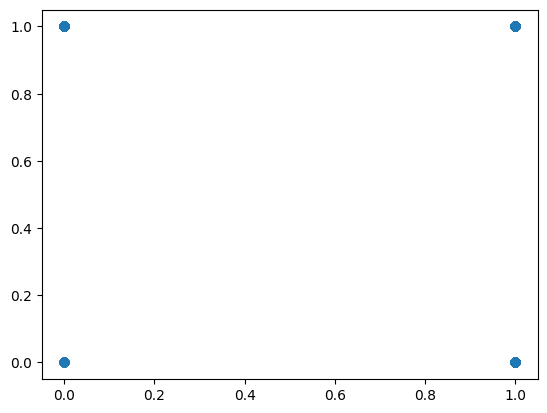

In [31]:
plt.scatter(x, y)
plt.show()

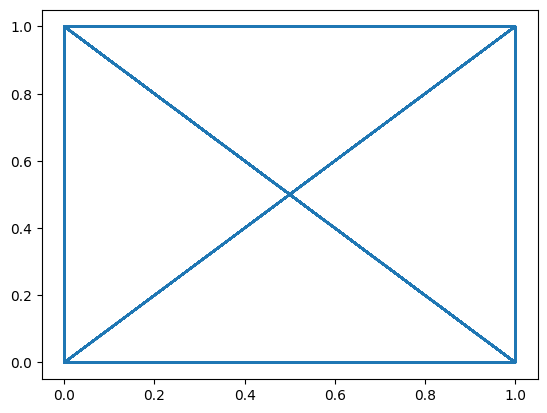

In [32]:
plt.plot(x, y)
plt.show()

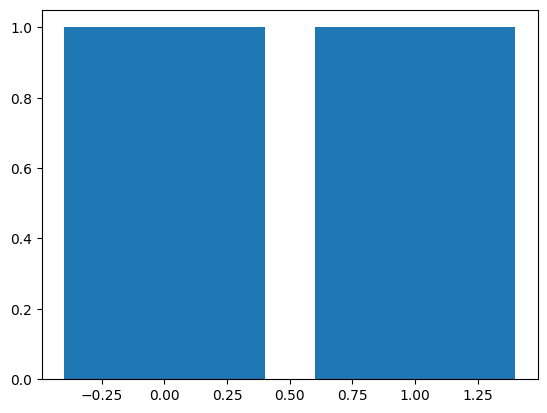

In [33]:
plt.bar(x, y)
plt.show()

In [34]:
x1 = df['age']
y1 = df['chol']

In [35]:
x1

0       52
1       52
2       70
3       61
4       62
        ..
1020    59
1021    60
1022    47
1023    50
1024    54
Name: age, Length: 1025, dtype: int64

In [36]:
y1

0       212
1        87
2       174
3       203
4       294
       ... 
1020    221
1021    258
1022    275
1023    254
1024    188
Name: chol, Length: 1025, dtype: int64

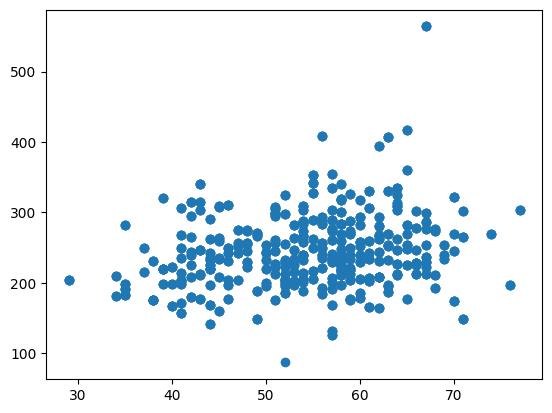

In [37]:
plt.scatter(x1, y1)
plt.show()

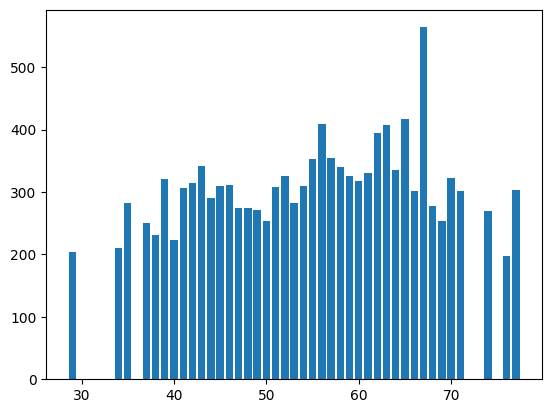

In [38]:
plt.bar(x1, y1)
plt.show()

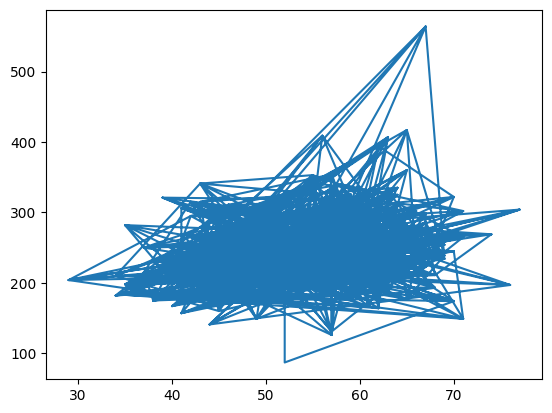

In [41]:
plt.plot(x1, y1)
plt.show()

In [42]:
x = df.drop('target', axis = 'columns')
y = df['target']

In [43]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1,2,2,3
1,52,1,0,125,87,0,1,168,0,1,2,2,3
2,70,1,0,145,174,0,1,125,1,2,0,0,3
3,61,1,0,148,203,0,1,161,0,0,2,1,3
4,62,0,0,138,294,1,1,106,0,1,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2,1,1,3
1022,47,1,0,110,275,0,0,118,1,1,1,1,2
1023,50,0,0,110,254,0,0,159,0,0,2,0,2


In [44]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [46]:
x_train.shape

(820, 13)

In [48]:
y_train.shape

(820,)

In [49]:
x_test.shape

(205, 13)

In [50]:
y_test.shape

(205,)

In [54]:
reg = LogisticRegression()

In [55]:
reg.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [56]:
y_pred = reg.predict(x_test)
y_pred

array([1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1])

In [57]:
y_pred.shape

(205,)

In [58]:
print(accuracy_score(y_test, y_pred))

0.8926829268292683
